## OSISAF MedRes Product Exploration
The following code makes use of the [`siphon`](https://unidata.github.io/siphon/latest/index.html) package that is currently only on [pip](https://pypi.org/project/siphon/)/[conda-forge](https://anaconda.org/conda-forge/siphon). Mix conda-forge and defaults channels at your own peril!

In [1]:
from siphon.catalog import TDSCatalog
from json import dumps
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
cat = TDSCatalog('https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/catalog.xml')

In [3]:
years_of_interest = ['2018', '2019']

### Interesting that some months have over 100 datasets

In [4]:
for year_ref in sorted(cat.catalog_refs):
    if year_ref in years_of_interest:
        year_cat = TDSCatalog(cat.catalog_url.rstrip('catalog.xml') + year_ref + '/catalog.xml')
        for month_ref in sorted(year_cat.catalog_refs):
            month_cat = TDSCatalog(year_cat.catalog_url.rstrip('catalog.xml') + month_ref + '/catalog.xml')
            print(f'OSISAF MR Catalog: {month_cat.catalog_url}\tn_datasets: {len(month_cat.datasets)}')

OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/01/catalog.xml	n_datasets: 60
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/02/catalog.xml	n_datasets: 55
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/03/catalog.xml	n_datasets: 61
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/04/catalog.xml	n_datasets: 59
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/05/catalog.xml	n_datasets: 61
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/06/catalog.xml	n_datasets: 57
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/07/catalog.xml	n_datasets: 62
OSISAF MR Catalog: https://thredds.met.no/thredds/catalog/osisaf/met.no/ice/drift_mr/2018/08/catalog.xml	n_datasets: 62
OSISAF MR Catalog: https://thredds.met.n

### Looking at an example dataset from Dec 2019, lots of ways to access the data!

In [31]:
example = month_cat.datasets[53]
print(dumps(example.access_urls, indent=2))

{
  "OPENDAP": "https://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/drift_mr/2019/12/ice_drift_nh_polstere-200_avhrr-ch4_201912171810_201912181749.nc",
  "HTTPServer": "https://thredds.met.no/thredds/fileServer/osisaf/met.no/ice/drift_mr/2019/12/ice_drift_nh_polstere-200_avhrr-ch4_201912171810_201912181749.nc",
  "WMS": "https://thredds.met.no/thredds/wms/osisaf/met.no/ice/drift_mr/2019/12/ice_drift_nh_polstere-200_avhrr-ch4_201912171810_201912181749.nc",
  "WCS": "https://thredds.met.no/thredds/wcs/osisaf/met.no/ice/drift_mr/2019/12/ice_drift_nh_polstere-200_avhrr-ch4_201912171810_201912181749.nc"
}


### Let's use OpenDAP

In [32]:
ds = xr.open_dataset(example.access_urls['OPENDAP'])
ds

<xarray.Dataset>
Dimensions:                   (xc: 379, yc: 559)
Coordinates:
  * xc                        (xc) float64 -3.78e+06 -3.76e+06 ... 3.78e+06
  * yc                        (yc) float64 5.58e+06 5.56e+06 ... -5.58e+06
Data variables:
    Polar_Stereographic_Grid  int32 ...
    data_status               (yc, xc) int32 ...
    correlation               (yc, xc) float32 ...
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
    lat1                      (yc, xc) float32 ...
    lon1                      (yc, xc) float32 ...
    dX                        (yc, xc) float32 ...
    dY                        (yc, xc) float32 ...
    Uncertainty               (yc, xc) float32 ...
Attributes:
    title:                   OSI SAF - Medium Resolution Sea Ice Displacement
    abstract:                Gridded ice displacement fields obtained from  s...
    topiccategory:           Oceans Climatology Meteorology Atmosphere
    keywords:                Sea Ice Motion, Sea Ice, Oceanography, Meteorolo...
    gcmd_keywords:           Cryosphere > Sea Ice > Sea Ice Motion\nOcean > S...
    activity_type:           Space borne instrument
    Conventions:             CF-1.4
    product_name:            osi_saf_mr_ice_drift
    product_id:              OSI-407-a
    product_status:          operational
    product_version:         2.1
    filter_level:            filtered
    history:                 Wed Dec 18 21:27:17 2019: ncks -A -v Uncertainty...
    area:                    Northern Hemisphere
    PI_name:                 Gorm Dybkjaer
    contact:                 safosi@dmi.dk
    distribution_statement:  Free
    project_name:            EUMETSAT OSI SAF
    institution:             Danish Meteorological Institute
    satelliteID_start:       M01
    satelliteID_end:         M01
    start_date:              2019-12-17 18:10:00 UTC
    stop_date:               2019-12-18 17:49:00 UTC
    platform:                AVHRR
    channel:                 ch_4
    northernsmost_latitude:  87.65047
    easternmost_longitude:   176.98721
    southernmost_latitude:   60.710766
    westernmost_longitude:   -180.0
    processed_gridpoints:    12573
    valid_data_prefilter:    3760
    valid_data:              903
    leap_days:               0.98541665
    references:              OSI SAF Medium Resolution Sea Ice Drift Product ...
    comment:                 This gridded product is based on swath data that...
    NCO:                     20191218

### What does the `data_status` variable mean?

In [33]:
print(dumps({k:v for k,v in zip(ds['data_status'].attrs['flag_values'].tolist(), ds['data_status'].attrs['status_values_meaning'].split(' '))}, indent=2))

{
  "0": "valid_driftvector",
  "1": "correlation_less_than_minimum",
  "2": "drift_speed_larger_than_maximum",
  "4": "\ndata_check_reference_and_compare_data_failed",
  "5": "drift_vector_removed_by_filter"
}


### Let's subset to only pixels that are considered `valid_driftvector`

In [34]:
valid = ds[['dX', 'dY']].where(ds['data_status'] == 0)

In [35]:
# setup the figure projection
print('From the source file:\n',ds['Polar_Stereographic_Grid'].attrs['proj4_string'])
crs = ccrs.Stereographic(
    central_latitude=90, 
    central_longitude=-45, 
    true_scale_latitude=70, 
    globe=ccrs.Globe(
        ellipse=None,
        semimajor_axis=6378273, 
        semiminor_axis=6356889.44891)
)
print('From cartopy:\n', crs.proj4_init)

From the source file:
 +proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45
From cartopy:
 +a=6378273 +b=6356889.44891 +proj=stere +lat_0=90 +lon_0=-45 +x_0=0.0 +y_0=0.0 +lat_ts=70 +no_defs


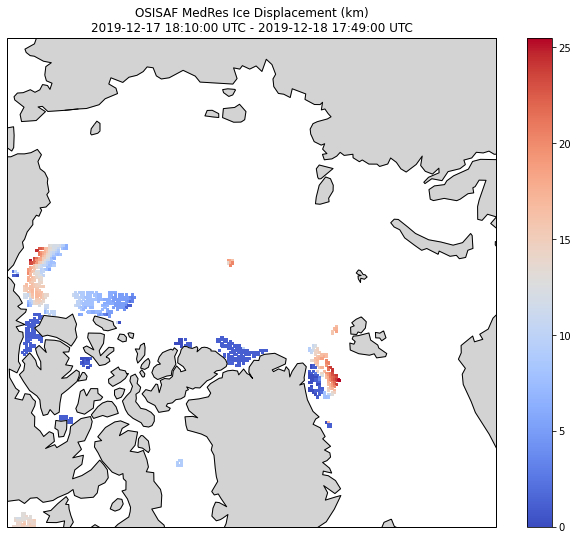

In [36]:
ax_title = f'OSISAF MedRes Ice Displacement ({sub["dX"].attrs["units"]})\n{ds.attrs["start_date"]} - {ds.attrs["stop_date"]}'
fig, ax = plt.subplots(figsize=(11,9), subplot_kw={'projection': crs})
ax.set_extent([-2.3e6, 2.3e6, -2.3e6, 2.3e6], crs=crs)
ax.coastlines(zorder=3)
ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor='lightgrey', zorder=2)
# simple euclidean distance from u/v components
xr.plot.pcolormesh(np.sqrt(valid['dX']**2 + valid['dY']**2), ax=ax, cmap='coolwarm')
ax.set_title(ax_title);

### Okay, not much there. Let's try with a less-strict filter

In [37]:
sub = ds[['dX', 'dY']].where(ds['data_status'] <= 2)

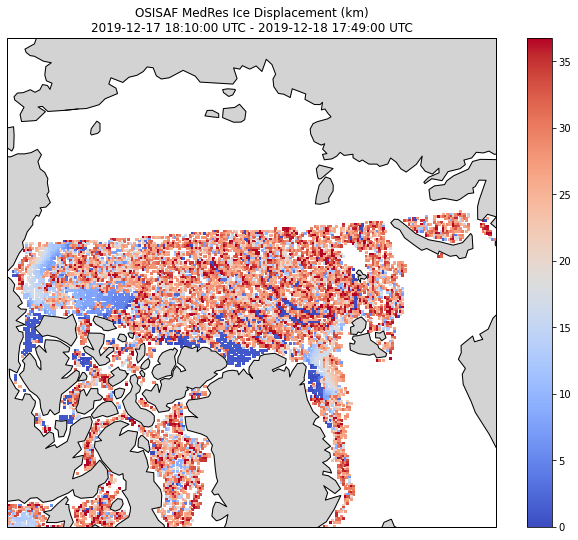

In [38]:
fig, ax = plt.subplots(figsize=(11,9), subplot_kw={'projection': crs})
ax.set_extent([-2.3e6, 2.3e6, -2.3e6, 2.3e6], crs=crs)
ax.coastlines(zorder=3)
ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor='lightgrey', zorder=2)
# simple euclidean distance from u/v components
xr.plot.pcolormesh(np.sqrt(sub['dX']**2 + sub['dY']**2), ax=ax, cmap='coolwarm')
ax.set_title(ax_title);